# ELEN 6885 Reinforcement Learning coding assignment

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import gym

## 1. Incremental Implementation of Average
We've finished the incremental implementation of average for you. Please call the function estimate with 1/step step size and fixed step size to compare the difference between this two on a simulated Bandit problem.<br />
<span style="color:red">(2 pts, 1 pt for each correct statement.)</span>

In [2]:
from RLalgs.utils import estimate
random.seed(6885)
numTimeStep = 10000
q_h = np.zeros(numTimeStep + 1) # Q Value estimate with 1/step step size
q_f = np.zeros(numTimeStep + 1) # Q value estimate with fixed step size
FixedStepSize = 0.5 #A large number to exaggerate the difference
for step in range(1, numTimeStep + 1):
    if step < numTimeStep / 2:
        r = random.gauss(mu = 1, sigma = 0.1)
    else:
        r = random.gauss(mu = 3, sigma = 0.1)
    
    #TIPS: Call function estimate defined in ./RLalgs/utils.py
    ############################
    # YOUR CODE STARTS HERE
    q_h[step] = estimate(OldEstimate = q_h[step - 1], StepSize = 1 / step, Target = r)
    q_f[step] = estimate(OldEstimate = q_f[step - 1], StepSize = FixedStepSize, Target = r)
    # YOUR CODE ENDS HERE
    ############################
    
q_h = q_h[1:]
q_f = q_f[1:]

RLalgs is a package containing Reinforcement Learning algorithms Epsilon-Greedy, Policy Iteration, Value Iteration, Q-Learning, and SARSA.


Plot the two Q value estimates. (Please include a title, labels on both axes, and legends)<br />
<span style="color:red">(3 pts)</span>

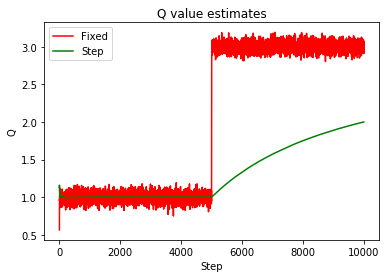

In [3]:
############################
# YOUR CODE STARTS HERE
x = np.arange(numTimeStep)
plt.plot(x, q_f, 'r', label = 'Fixed')
plt.plot(x, q_h, 'g', label = 'Step')
plt.title('Q value estimates')
plt.xlabel('Step')
plt.ylabel('Q')
plt.legend()
plt.show()
plt.close()
# YOUR CODE ENDS HERE
############################

## 2. $\epsilon$-Greedy for Exploration
In Reinforcement Learning, we are always faced with the dilemma of exploration and exploitation. $\epsilon$-Greedy is a trade-off between them. You are gonna implement Greedy and $\epsilon$-Greedy. We combine these two policies in one function by treating Greedy as $\epsilon$-Greedy where $\epsilon = 0$. Edit the function epsilon_greedy in ./RLalgs/utils.py.<br />
<span style="color:red">(5 pts)</span>

In [4]:
from RLalgs.utils import epsilon_greedy
np.random.seed(6885) #Set the seed to cancel the randomness
q = np.random.normal(0, 1, size = 5)
############################
# YOUR CODE STARTS HERE
greedy_action = epsilon_greedy(q, e = 0) #Use epsilon = 0 for Greedy
e_greedy_action = epsilon_greedy(q, e = 0.1, seed = 6885) #Use epsilon = 0.1 and pass the parameter seed = 6885 to the function
# YOUR CODE ENDS HERE
############################
print('Values:')
print(q)
print('Greedy Choice =', greedy_action)
print('Epsilon-Greedy Choice =', e_greedy_action)

Values:
[ 0.61264537  0.27923079 -0.84600857  0.05469574 -1.09990968]
Greedy Choice = 0
Epsilon-Greedy Choice = 4


## 3. Frozen Lake Environment 

In [5]:
env = gym.make('FrozenLake-v0')

### 3.1 Derive Q value from V value
Edit function action_evaluation in ./RLalgs/utils.py.<br />
TIPS: $q(s, a)=\sum_{s',r}p(s',r|s,a)(r+\gamma v(s'))$<br />
<span style="color:red">(5 pts)</span>

In [6]:
from RLalgs.utils import action_evaluation
v = np.ones(16)
q = action_evaluation(env = env.env, gamma = 1, v = v)
print('Action values:')
print(q)

Action values:
[[1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.33333333 1.33333333 1.33333333]
 [1.         1.         1.         1.        ]]


Pseudo-codes of the following four algorithms can be found on Page 80, 83, 130, 131 of the Sutton's book

### 3.2 Model-based RL algorithms

In [7]:
from RLalgs.utils import action_evaluation, action_selection, render

### 3.2.1 Policy Iteration
Edit the function policy_iteration and relevant functions in ./RLalgs/pi.py to implement the Policy Iteration Algorithm.<br />
<span style="color:red">(15 pts)</span>

In [8]:
from RLalgs.pi import policy_iteration
V, policy, numIterations = policy_iteration(env = env.env, gamma = 1, max_iteration = 500, theta = 1e-7)
print('State values:')
print(V)
print('Number of iterations =', numIterations)

State values:
[0.82352774 0.8235272  0.82352682 0.82352662 0.82352791 0.
 0.52941063 0.         0.82352817 0.82352851 0.76470509 0.
 0.         0.88235232 0.94117615 0.        ]
Number of iterations = 7


In [9]:
#Uncomment and run the following to evaluate your result, comment them when you generate the pdf
#Q = action_evaluation(env = env.env, gamma = 1, v = V)
#policy_estimate = action_selection(Q)
#render(env, policy_estimate)

### 3.2.2 Value Iteration
Edit the function value_iteration and relevant functions in ./RLalgs/vi.py to implement the Value Iteration Algorithm.<br />
<span style="color:red">(10 pts)</span>

In [10]:
from RLalgs.vi import value_iteration
V, policy, numIterations = value_iteration(env = env.env, gamma = 1, max_iteration = 500, theta = 1e-7)
print('State values:')
print(V)
print('Number of iterations to converge =', numIterations)

State values:
[0.82352773 0.82352718 0.8235268  0.8235266  0.8235279  0.
 0.52941062 0.         0.82352816 0.8235285  0.76470509 0.
 0.         0.88235231 0.94117615 0.        ]
Number of iterations to converge = 389


In [11]:
#Uncomment and run the following to evaluate your result, comment them when you generate the pdf
#Q = action_evaluation(env = env.env, gamma = 1, v = V)
#policy_estimate = action_selection(Q)
#render(env, policy_estimate)

### 3.3 Model free RL algorithms

### 3.3.1 Q-Learning
Edit the function QLearning in ./RLalgs/ql.py to implement the Q-Learning Algorithm.<br />
<span style="color:red">(10 pts)</span>

In [12]:
from RLalgs.ql import QLearning
Q = QLearning(env = env.env, num_episodes = 1000, gamma = 1, lr = 0.1, e = 0.1)
print('Action values:')
print(Q)

Action values:
[[1.02405909e-01 9.58216022e-02 9.81124857e-02 1.28818349e-01]
 [6.43576477e-02 9.21088455e-02 7.39878390e-02 1.25913466e-01]
 [1.21975612e-01 8.03270922e-02 9.13599206e-02 8.51230365e-02]
 [3.92549483e-04 6.41282961e-02 3.03782841e-03 3.13645186e-02]
 [9.99462064e-02 1.68500295e-02 1.78816826e-02 1.38107308e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.88803329e-02 6.03357599e-02 1.04356546e-01 9.41331702e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.73641876e-03 2.68005127e-02 9.53517803e-02 2.84725880e-02]
 [2.60501185e-02 8.32641604e-02 1.57628577e-01 7.92590157e-02]
 [2.14211013e-01 8.15102806e-02 6.54304024e-02 2.81501166e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.65911683e-02 2.38010290e-01 1.85760063e-01]
 [1.78624460e-01 2.35567930e-01 3.10237521e-01 4.78805214e-01]
 [0.00000000e+00 0.00000000e+00 0.000000

In [13]:
#Uncomment the following to evaluate your result, comment them when you generate the pdf
#policy_estimate = action_selection(Q)
#render(env, policy_estimate)

### 3.3.2 SARSA
Edit the function SARSA in ./RLalgs/sarsa.py to implement the SARSA Algorithm.<br />
<span style="color:red">(10 pts)</span>

In [14]:
from RLalgs.sarsa import SARSA
Q = SARSA(env = env.env, num_episodes = 1000, gamma = 1, lr = 0.1, e = 0.1)
print('Action values:')
print(Q)

Action values:
[[1.31009767e-02 3.54729081e-02 1.13287329e-02 1.62574886e-02]
 [6.07796166e-04 6.15504816e-03 4.85709830e-03 3.44904262e-02]
 [3.99863213e-02 9.95930853e-03 1.79360236e-02 1.23135249e-02]
 [2.20013385e-02 1.45223632e-03 0.00000000e+00 4.17928477e-04]
 [5.58993530e-02 1.40131547e-02 7.02982455e-03 1.36970741e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.47191509e-02 3.92794684e-02 3.04952848e-02 8.43472469e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.71173945e-03 2.97919996e-03 1.06937094e-01 8.69408601e-03]
 [3.45876871e-02 2.14651049e-01 9.20595837e-02 4.26614568e-02]
 [3.26140365e-01 1.63752925e-01 1.33159709e-01 1.96942133e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.26456876e-02 1.29965990e-01 3.79156983e-01 4.06771719e-02]
 [8.75669305e-02 1.89335593e-01 1.56890560e-01 5.90812744e-01]
 [0.00000000e+00 0.00000000e+00 0.000000

In [15]:
#Uncomment the following to evaluate your result, comment them when you generate the pdf
#policy_estimate = action_selection(Q)
#render(env, policy_estimate)

### 3.4 Human
You can play this game if you are interested. See if you can get the frisbee either with or without the model

In [16]:
from RLalgs.utils import human_play
#Uncomment and run the following to play the game, comment it when you generate the pdf
#human_play(env)

## 4. Exploration VS. Exploitation
Try to reproduce Figure 2.2 (the upper one is enough) of the Sutton's book based on the experiment described in Chapter 2.3.<br />
<span style="color:red">Extra credit (3 pts)</span>

In [17]:
# Do the experiment and record average reward acquired in each time step
############################
# YOUR CODE STARTS HERE
from RLalgs.utils import epsilon_greedy
from RLalgs.utils import estimate
numBandit = 2000 #Number of Bandit problems
numStep = 1000 #Number of steps

R = np.zeros([3, numStep + 1]) #Average Rewards acquired
for i in range(numBandit):
    q_star = np.random.normal(0, 1, size = 10)
    Na = np.zeros([3, 10]) #Number of each action played
    q = np.zeros([3, 10]) #Reward estimate
    AvR = np.zeros([3, numStep + 1]) #Average Rewards acquired
    for step in range(numStep):
        a1 = epsilon_greedy(q[0], e = 0)
        a2 = epsilon_greedy(q[1], e = 0.01)
        a3 = epsilon_greedy(q[2], e = 0.1)
        r1 = np.random.normal(q_star[a1], 1)
        r2 = np.random.normal(q_star[a2], 1)
        r3 = np.random.normal(q_star[a3], 1)
        Na[np.arange(3), [a1, a2, a3]] += 1
        q[0, a1] = estimate(OldEstimate = q[0, a1], StepSize = 1 / Na[0, a1], Target = r1)
        q[1, a2] = estimate(OldEstimate = q[1, a2], StepSize = 1 / Na[1, a2], Target = r2)
        q[2, a3] = estimate(OldEstimate = q[2, a3], StepSize = 1 / Na[2, a3], Target = r3)
        AvR[0, step] = estimate(OldEstimate = AvR[0, step - 1], StepSize = 1 / (step + 1), Target = r1)
        R[0, step] = estimate(OldEstimate = R[0, step], StepSize = 1 / (i + 1), Target = AvR[0, step]) 
        AvR[1, step] = estimate(OldEstimate = AvR[1, step - 1], StepSize = 1 / (step + 1), Target = r2) 
        R[1, step] = estimate(OldEstimate = R[1, step], StepSize = 1 / (i + 1), Target = AvR[1, step]) 
        AvR[2, step] = estimate(OldEstimate = AvR[2, step - 1], StepSize = 1 / (step + 1), Target = r3)
        R[2, step] = estimate(OldEstimate = R[2, step], StepSize = 1 / (i + 1), Target = AvR[2, step]) 

#R = R[:, 1:]
# YOUR CODE ENDS HERE
############################

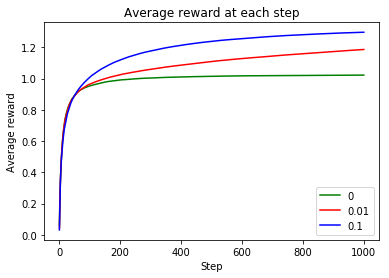

In [18]:
# Plot the average reward
############################
# YOUR CODE STARTS HERE
x = np.arange(1, numStep + 1)
plt.plot(x, R[0, :-1], 'g', label = '0')
plt.plot(x, R[1, :-1], 'r', label = '0.01')
plt.plot(x, R[2, :-1], 'b', label = '0.1')
plt.title('Average reward at each step')
plt.xlabel('Step')
plt.ylabel('Average reward')
plt.legend()
plt.show()
plt.close()
# YOUR CODE ENDS HERE
############################

You should get curves similar to that in the book.